In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(10,20)



In [12]:
df1=pd.read_csv('/content/cleaned_data.csv')
df1


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
11557,Bellandur,1262.0,2.0,47.00,2
11558,Green Glen Layout,1715.0,3.0,112.00,3
11559,Whitefield,3453.0,4.0,231.00,5
11560,other,3600.0,5.0,400.00,4


In [15]:
df1.shape

(11562, 5)

In [22]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,0
price,0


In [17]:
df2.bath.mean()
df2.bath=df2.bath.fillna(df2.bath.mean())

In [25]:
df3=df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [27]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [29]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


<ipython-input-29-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [31]:
df3.bhk.head()

,bhk
0,2
1,4
2,3
3,3
4,2


In [32]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [33]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [34]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [35]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [39]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.00000,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.00000,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.69261,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.00000,59.135,2


In [41]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [45]:
convert_sqft_to_num('1100-1200')

1150.0

In [47]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [48]:
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [49]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [53]:
len(df5['location'].unique())


1304

In [54]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,540
Sarjapur Road,397
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [55]:
len(location_stats[location_stats<=10])

1052

In [56]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10


,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [57]:
len(df5.location.unique())

1293

In [58]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [59]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [60]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [61]:
df5.shape

(13303, 7)

In [62]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12559, 7)

In [63]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12513.000000
mean,6307.441644
std,4160.931610
min,267.829813
25%,4210.526316
50%,5295.007564
75%,6916.666667
max,176470.588235


In [64]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df7=remove_pps_outliers(df6)
df7.shape


(10286, 7)

In [65]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats['mean']=np.mean(bhk_df.price_per_sqft)
      bhk_stats['std']=np.std(bhk_df.price_per_sqft)
      gen_df=bhk_df[(bhk_df.price_per_sqft>(bhk_stats['mean']-bhk_stats['std'])) &
                    (bhk_df.price_per_sqft<=(bhk_stats['mean']+bhk_stats['std']))]
      exclude_indices=np.append(exclude_indices,bhk_df.index.values)
      return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape


(10285, 7)

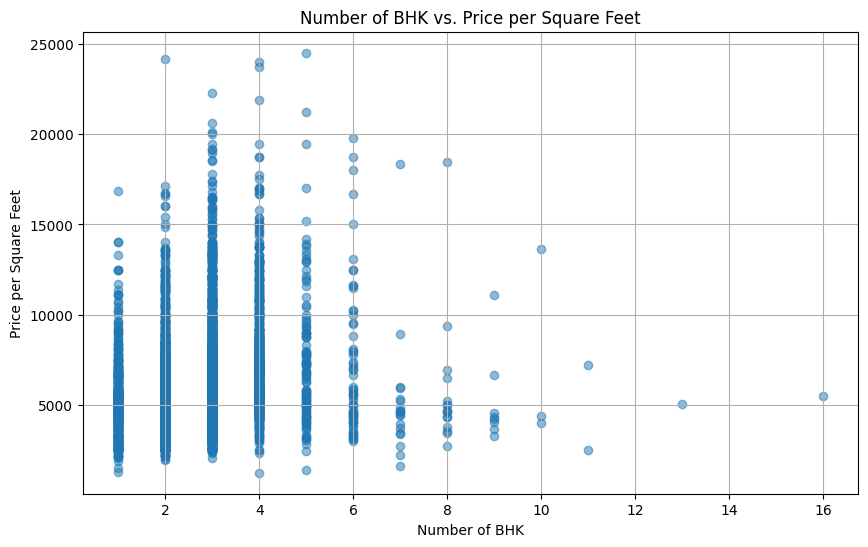

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df8['bhk'], df8['price_per_sqft'], alpha=0.5)
plt.xlabel('Number of BHK')
plt.ylabel('Price per Square Feet')
plt.title('Number of BHK vs. Price per Square Feet')
plt.grid(True)
plt.show()

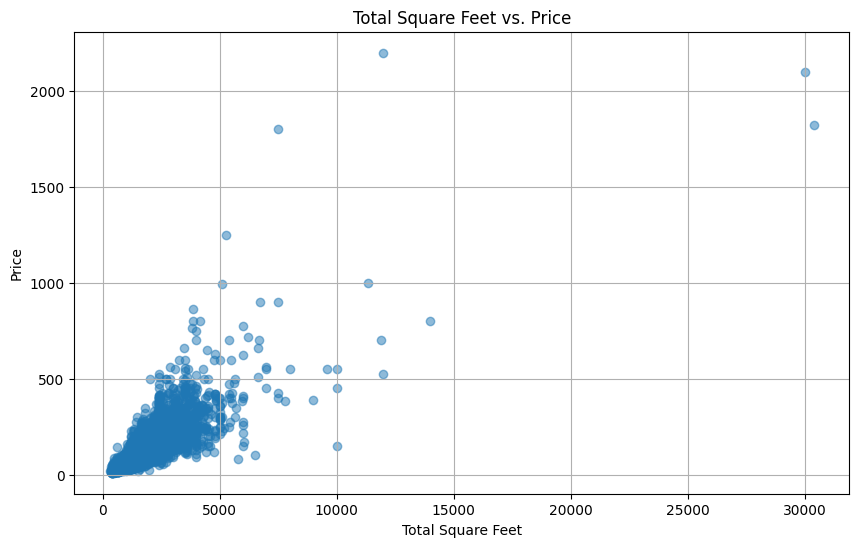

In [70]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(df8['total_sqft'], df8['price'], alpha=0.5) #alpha controls the transparency of the points
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Total Square Feet vs. Price')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Total Square Feet vs. Price per Square Feet')

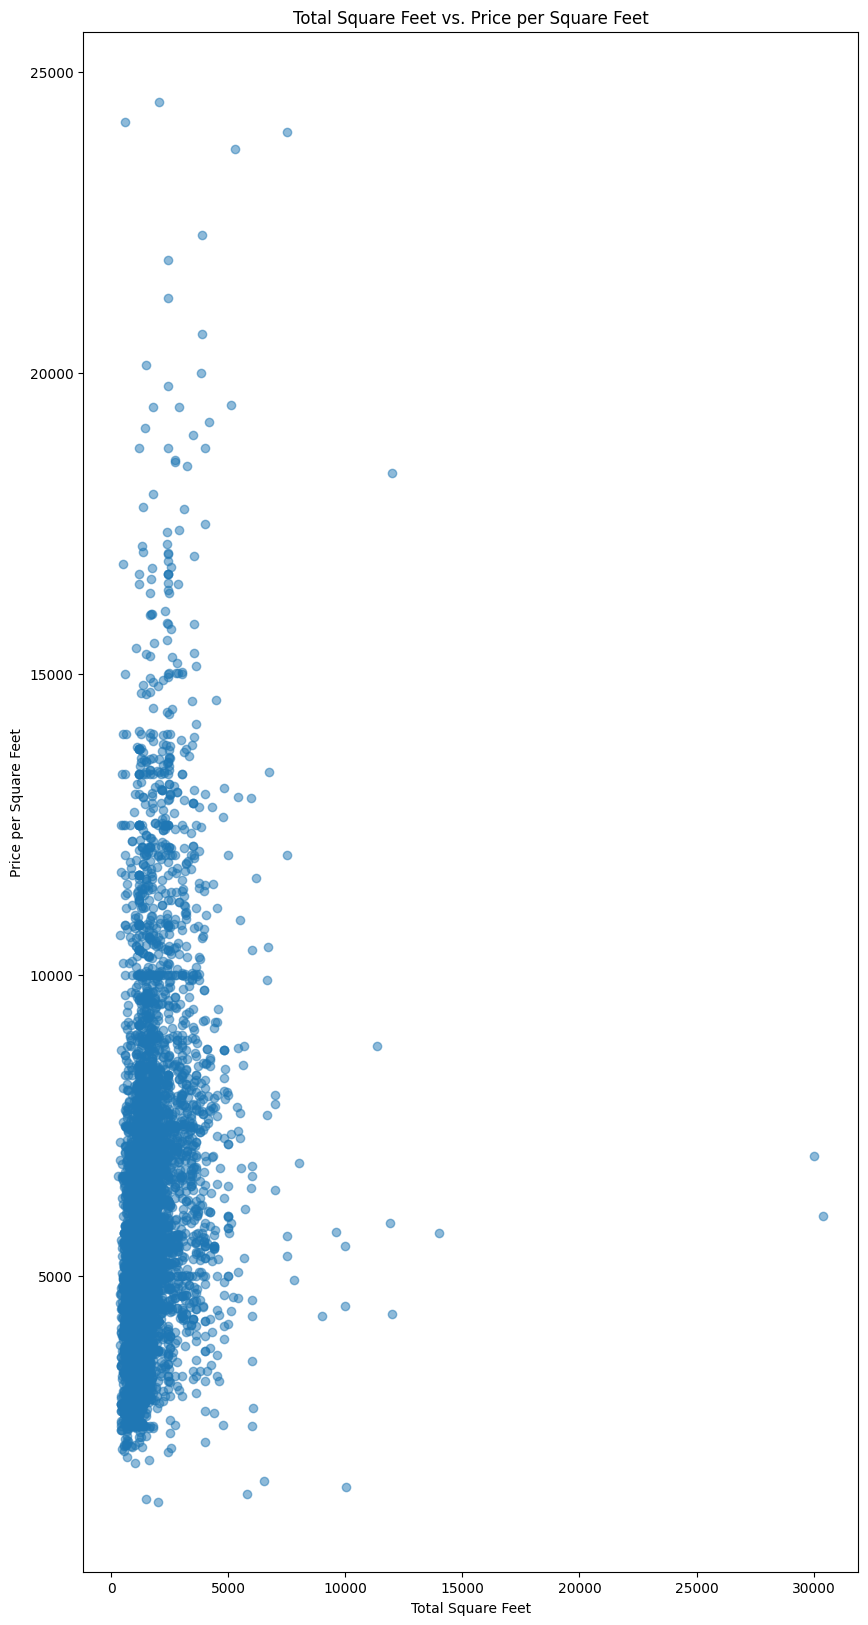

In [72]:
plt.scatter(df8['total_sqft'], df8['price_per_sqft'], alpha=0.5)
plt.xlabel('Total Square Feet')
plt.ylabel('Price per Square Feet')
plt.title('Total Square Feet vs. Price per Square Feet')

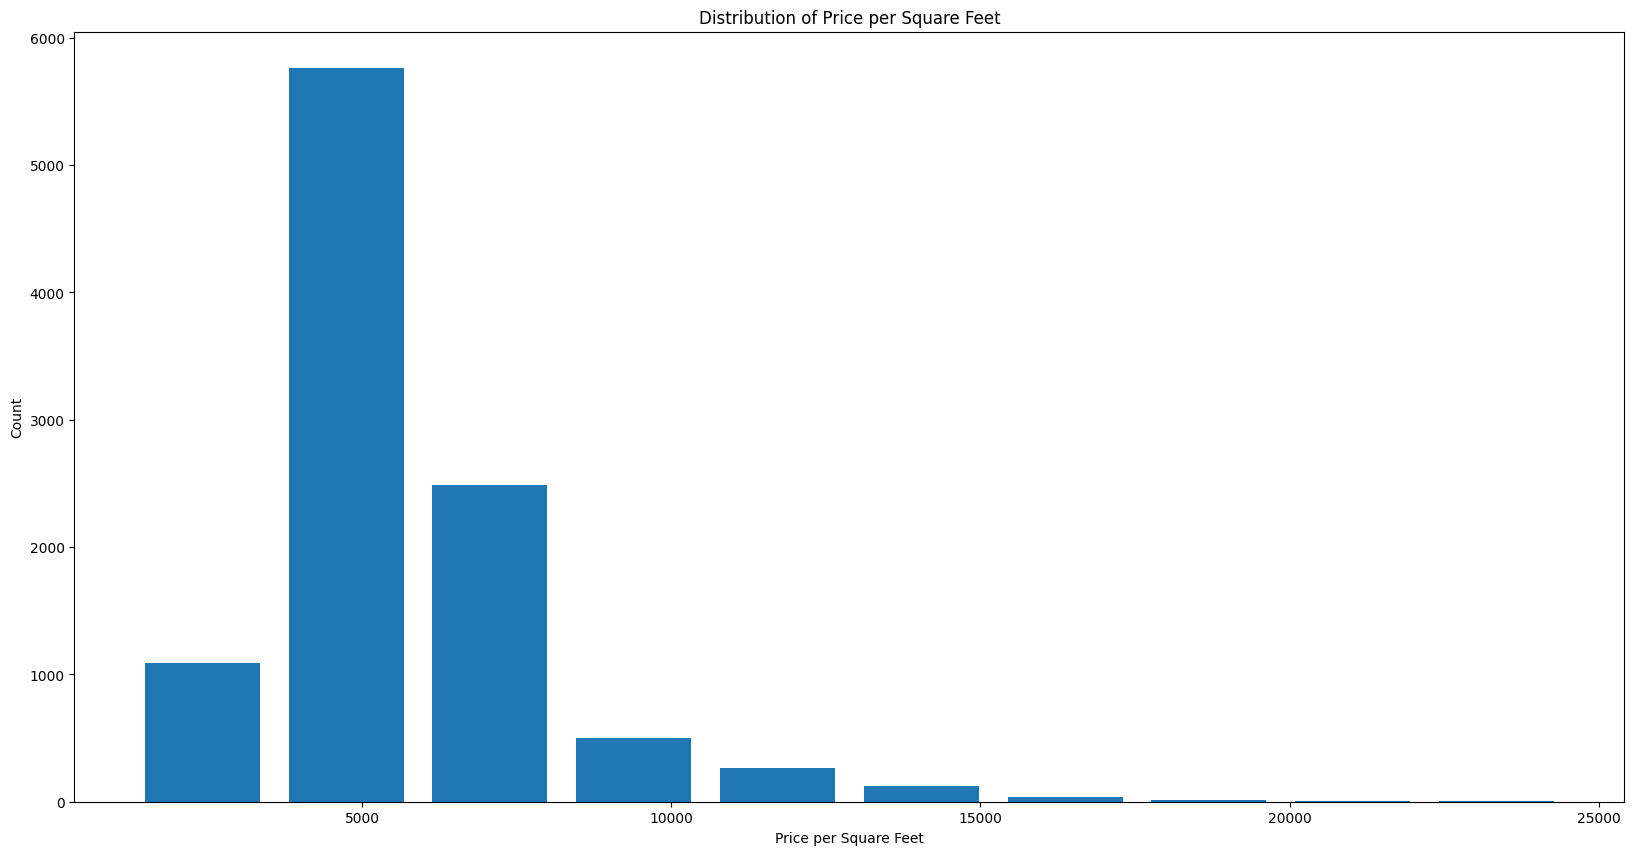

In [73]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')
plt.title('Distribution of Price per Square Feet')
plt.show()

In [76]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [75]:
# prompt: remove the data from bath where value is in fraction

df8 = df8[~df8['bath'].apply(lambda x: isinstance(x, float) and x.is_integer() == False)]

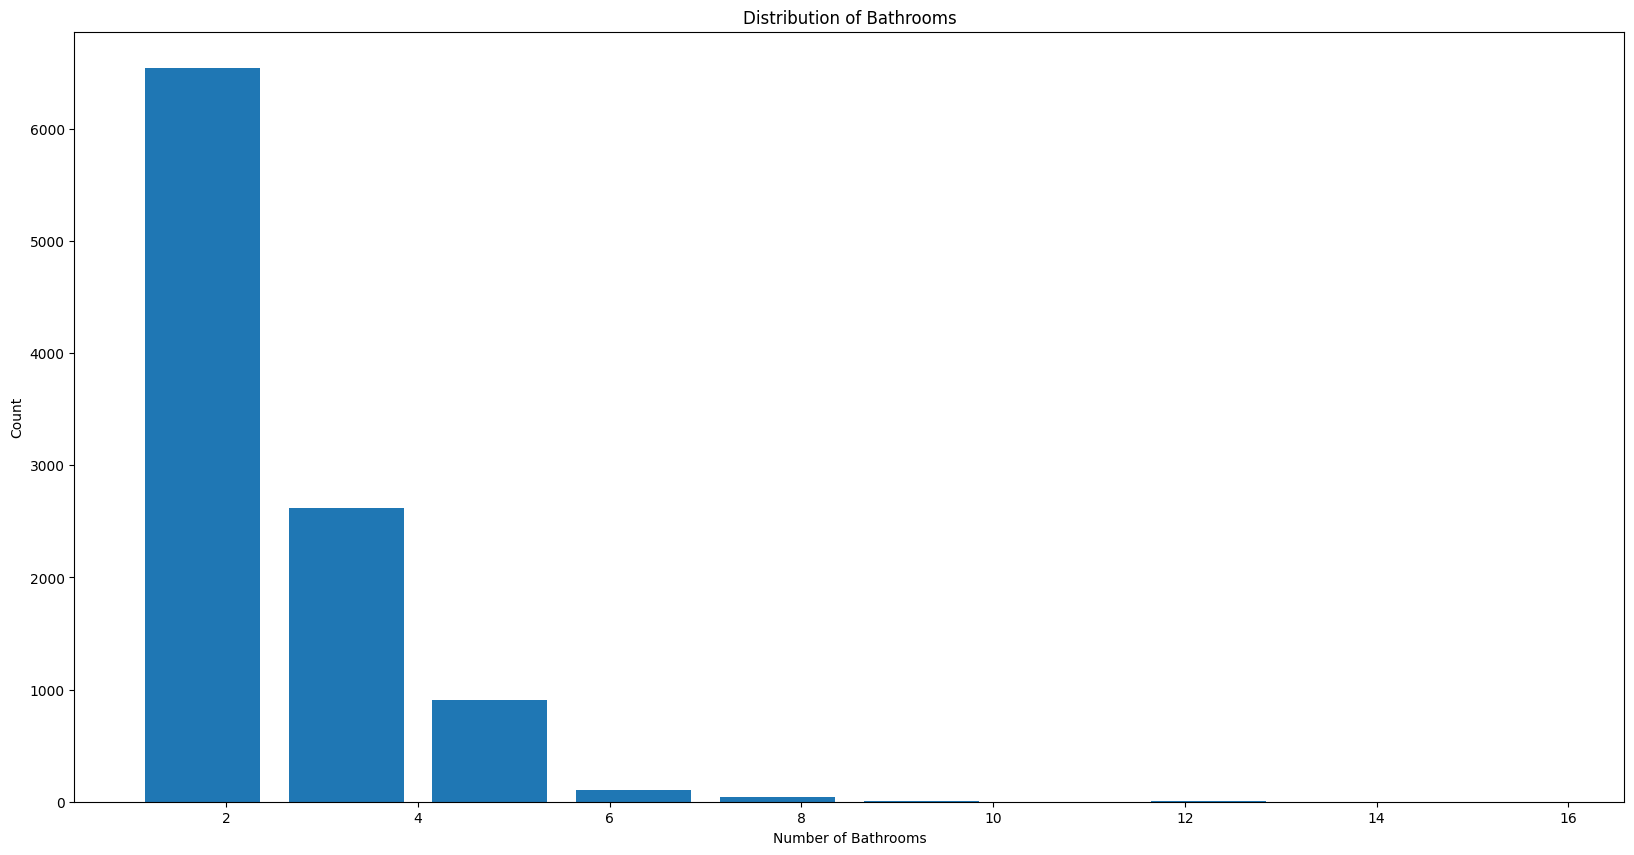

In [77]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms')
plt.show()

In [78]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [79]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(10140, 7)

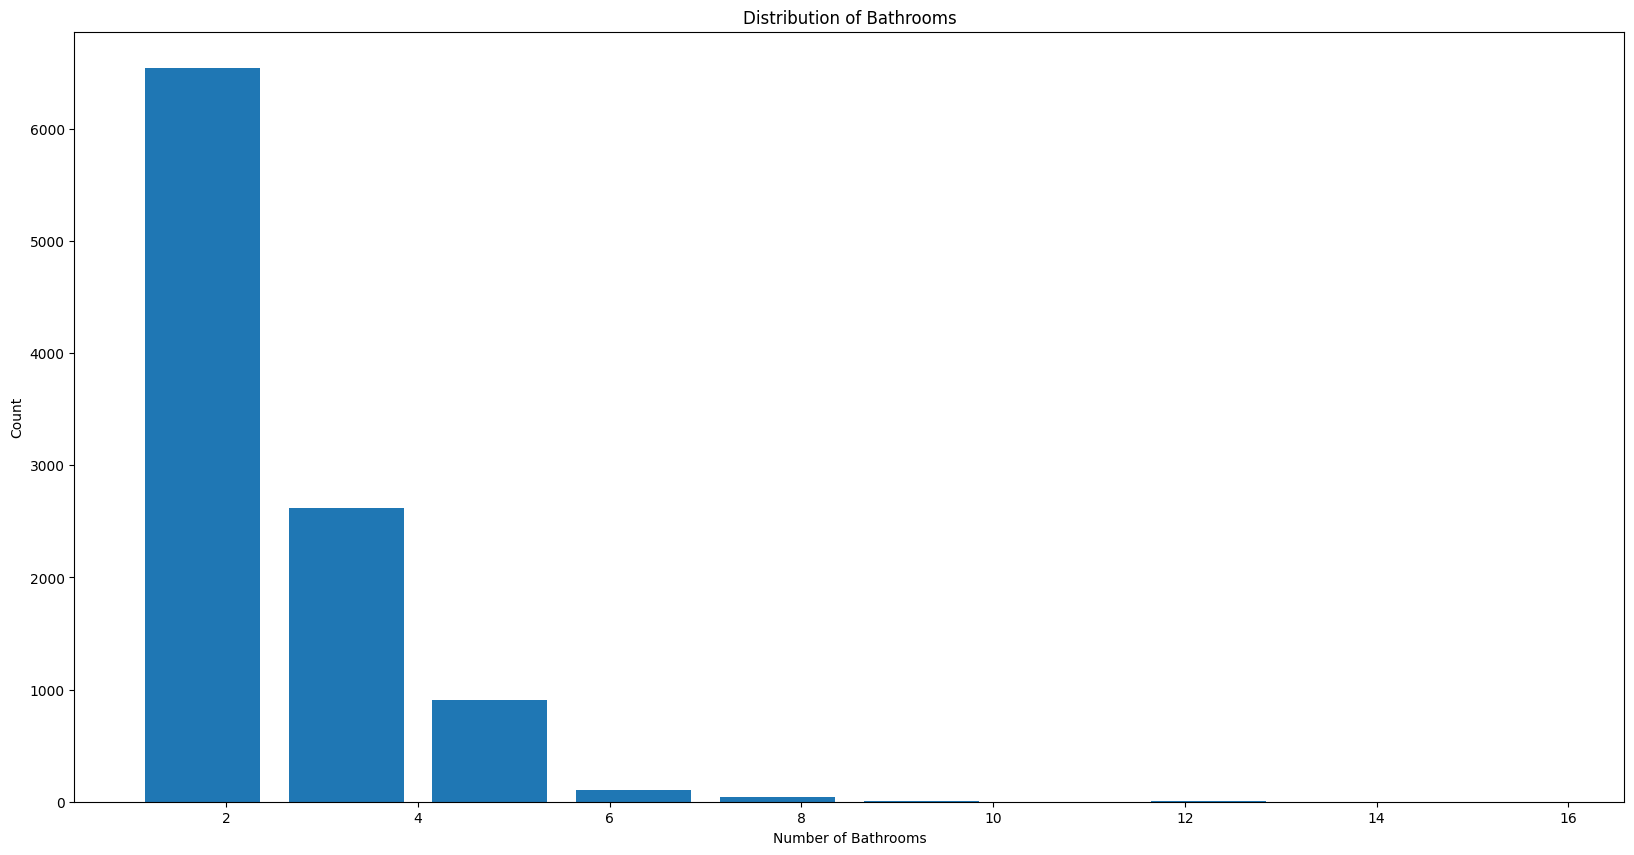

In [80]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms')
plt.show()

In [81]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
5,1st Block Jayanagar,2750.0,4.0,413.0,4


In [86]:
df10.drop(columns=['dummy_col'],inplace=True)

In [88]:
dummies=pd.get_dummies(df10.location)

In [89]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Block Jayanagar,2750.0,4.0,413.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2750.0,4.0,413.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df12.shape

(10140, 245)

In [118]:
X=df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2750.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
y=df12.price
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
5,413.0


In [129]:
# prompt: from this give me the code of first model from Linear riggression model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df12 is already created as in the provided code
# ... (all the preprocessing steps from the original code)

X = df12.drop(['price'], axis='columns')
y = df12.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [131]:
lr_clf.score(X_test,y_test)

0.7938851317432953

In [132]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index >=0:
    x[loc_index]=1

  return lr_clf.predict([x])[0]

In [133]:
print(predict_price('1st Phase JP Nagar',1000,2,2))

93.80074752072098


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [134]:
print(predict_price('1st Phase JP Nagar',1000,3,3))

95.57716023749715


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [136]:
print(predict_price('Indira Nagar',1000,3,3))

186.01039587005897


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)


In [138]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))